Mounting & Importing

In [ ]:
!pip install bbox-visualizer

In [1]:
import numpy as np
import pandas as pd
from glob import glob # Retrieve files/pathnames matching a specified pattern
import shutil, os #operations on files, operating system dependent functionality

import matplotlib.pyplot as plt
import seaborn as sns
#import bbox_visualizer as bbv

from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm #Progress bar

import cv2
from skimage.io import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Df cleansing 

In [4]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train.csv')
df.head(25)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0,2568,3353
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0,2304,2880
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0,2540,3072


In [ ]:
df2 =df.replace({ 'class_name': 'Nodule/Mass'}, 'Consolidation')
df2.head(25)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555
7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,557.0,2352.0,675.0,2484.0,2568,3353
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0,2304,2880
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0,2540,3072


In [ ]:
df2 =df2.replace({ 'class_name': 'Atelectasis'}, 'Consolidation')
df2.head(25)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555
7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,557.0,2352.0,675.0,2484.0,2568,3353
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0,2304,2880
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0,2540,3072


In [ ]:
df2.head(25)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555
7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,557.0,2352.0,675.0,2484.0,2568,3353
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0,2304,2880
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0,2540,3072


In [ ]:
df2 =df2.replace({ 'class_name': 'Lung Opacity'}, 'Consolidation')
df2.head(25)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555
7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,557.0,2352.0,675.0,2484.0,2568,3353
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0,2304,2880
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0,2540,3072


In [ ]:
df_cons = df2[df2["class_name"]=='Consolidation']


In [ ]:
df_cons.to_excel('/content/drive/MyDrive/Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/consolidations.xlsx')

#Import cleansed DF 

In [ ]:
import pandas as pd 
df_cons = pd.read_excel('/content/drive/MyDrive/Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/consolidations.xlsx')

In [ ]:
print("number of unique images in the Data-frame is {}".format(df_train_sin_no_f['image_id'].nunique()))

number of unique images in the Data-frame is 353


In [ ]:
def visualize_plot(idx):
    image = df_cons['image_id'].values[idx]
    records = df_cons[df_cons['image_id'] == image]
    boxes = np.array(records[['x_min','y_min','x_max','y_max']])
    
    labels = records.class_name
    sample = imread(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/','train',f'{image}.jpg'))
    img = cv2.cvtColor(sample,cv2.COLOR_GRAY2RGB)#[sample,sample,sample]#.copy()
    plt.figure(figsize=(16, 16))
    for box,label in zip(boxes,labels):
        bbv.add_label(img, 
                      label, 
                      [int(round(box[0])), int(round(box[1])),int(round(box[2])), int(round(box[3]))], 
                      draw_bg=True,
                      text_bg_color=(255,0,0),
                      text_color=(0,0,0),
                        )
        cv2.rectangle(img ,
                      (int(round(box[0])), int(round(box[1]))),
                      (int(round(box[2])), int(round(box[3]))),
                      (255,0,0),
                      2)

    plt.imshow(img)

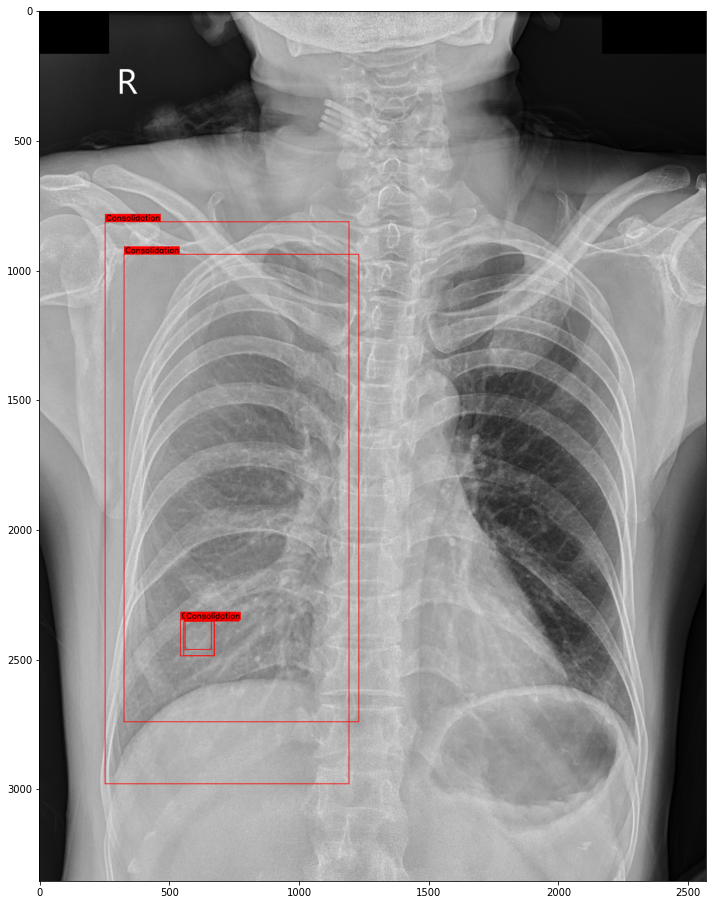

In [ ]:
visualize_plot(0)

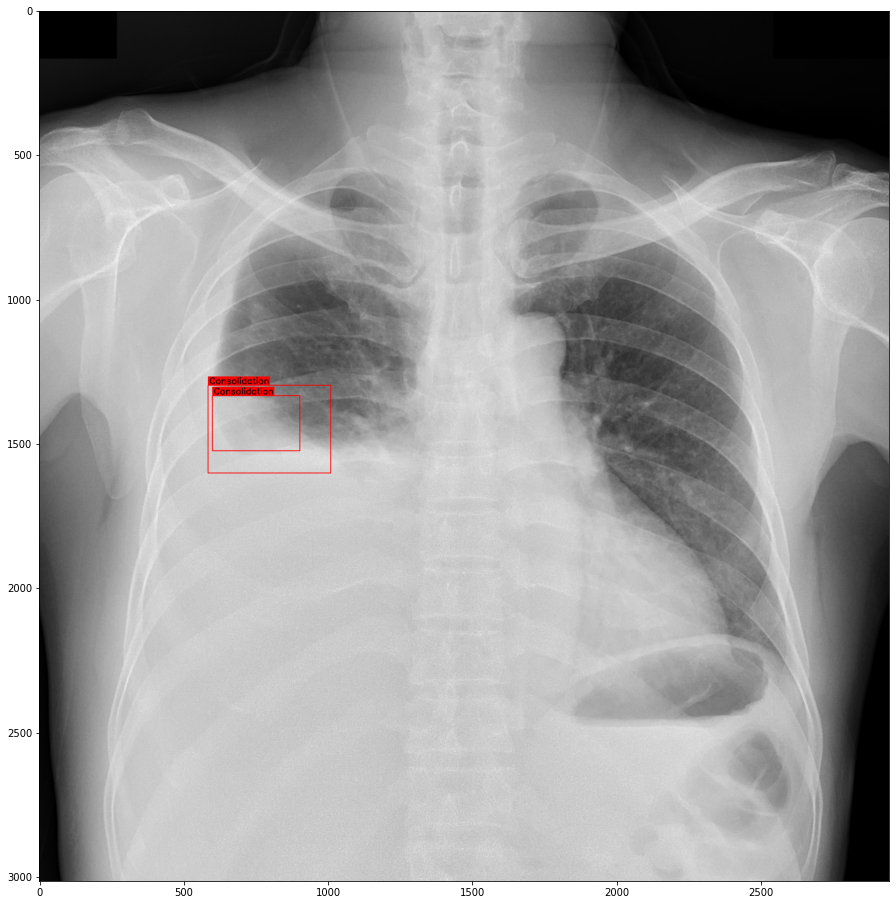

In [ ]:
visualize_plot(1)

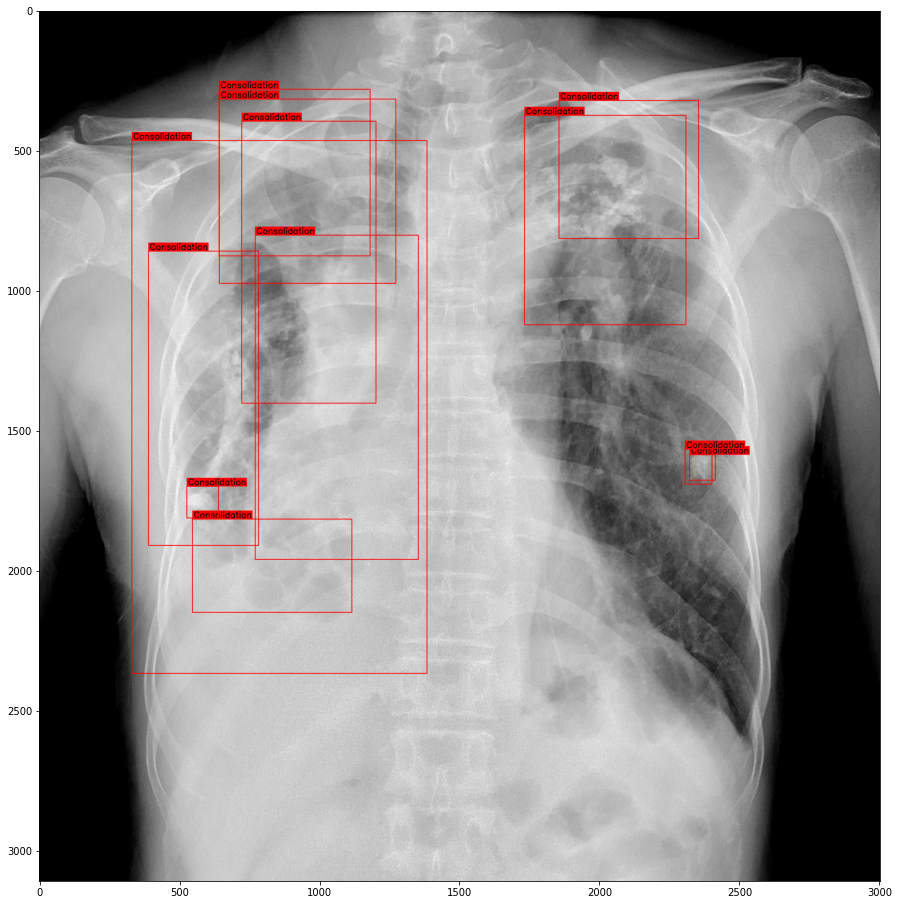

In [ ]:
visualize_plot(2)

# Ajustamos las etiquetas

In [ ]:
# Hacemos que las posiciones sean un valor entre 0 y 1. (dividimos cada posicion por el total en la dimension de la imagen original)
df_cons['x_min'] = df_cons.apply(lambda row: (row.x_min)/row.width, axis =1)
df_cons['y_min'] = df_cons.apply(lambda row: (row.y_min)/row.height, axis =1)

df_cons['x_max'] = df_cons.apply(lambda row: (row.x_max)/row.width, axis =1)
df_cons['y_max'] = df_cons.apply(lambda row: (row.y_max)/row.height, axis =1)

# Calculamos el centro del BB
df_cons['x_mid'] = df_cons.apply(lambda row: (row.x_max+row.x_min)/2, axis =1)
df_cons['y_mid'] = df_cons.apply(lambda row: (row.y_max+row.y_min)/2, axis =1)

# Calculamos width y height de cada BB pero normalizado
df_cons['w'] = df_cons.apply(lambda row: (row.x_max-row.x_min), axis =1)
df_cons['h'] = df_cons.apply(lambda row: (row.y_max-row.y_min), axis =1)

# calculamos el % de área del total de la imagen que representa el BB.
df_cons['area'] = df_cons['w']*df_cons['h']
df_cons.head()

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area
0,7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,0.216900,0.701461,0.262850,0.740829,2568,3353,0.239875,0.721145,0.045950,0.039368,0.001809
1,10,7c1add6833d5f0102b0d3619a1682a64,Consolidation,7,R10,0.203804,0.441938,0.306726,0.505309,2944,3014,0.255265,0.473623,0.102921,0.063371,0.006522
2,17,80caa435b6ab5edaff4a0a758ffaec6e,Consolidation,1,R9,0.110297,0.148696,0.461180,0.761184,3001,3107,0.285738,0.454940,0.350883,0.612488,0.214912
3,36,be1bb194dfb986bf7554b491852b8901,Consolidation,7,R9,0.726888,0.500000,0.819661,0.594727,3072,3072,0.773275,0.547363,0.092773,0.094727,0.008788
4,40,8e063eadea9a6aeb684c893c8598be3e,Consolidation,8,R10,0.132581,0.587107,0.154443,0.601887,2836,3180,0.143512,0.594497,0.021862,0.014780,0.000323


#Split sin Cross Validation 

In [ ]:
df_cons.groupby(['image_id'])['class_name'].count().max()

55

In [ ]:
df_cons.groupby(['image_id'])['class_name'].count().min()

1

In [ ]:
df_cons.groupby(['image_id'])['class_name'].count().describe()

count    1851.000000
mean        3.186386
std         3.769343
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        55.000000
Name: class_name, dtype: float64

Como podemos ver en el gráfico a continuación, la distribución de bounding boxes no es normal. Por lo tanto, lo correcto sería utilizar la mediana como medida de tendencia central, para garantizar dos clases: muchos bounding box - pocos bounding box que sean similares en cuanto a número de elementos por clase


{'boxes': [<matplotlib.lines.Line2D at 0x7f286c841410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f286ccd2910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f286c889a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f286c889f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f286c8a66d0>,
  <matplotlib.lines.Line2D at 0x7f286c8a5410>]}

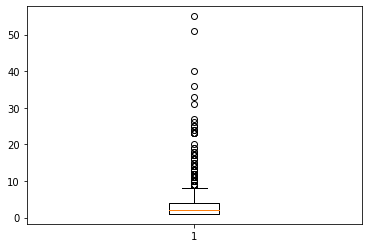

In [ ]:
plt.boxplot(df_cons.groupby(['image_id'])['image_id'].count())

(array([629., 409., 291., 191., 115.,  59.,  47.,  21.,  17.,  14.,   9.,
          7.,   5.,   5.,   2.,   3.,   4.,   2.,   2.,   1.,   0.,   0.,
          5.,   2.,   3.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 1.        ,  1.98181818,  2.96363636,  3.94545455,  4.92727273,
         5.90909091,  6.89090909,  7.87272727,  8.85454545,  9.83636364,
        10.81818182, 11.8       , 12.78181818, 13.76363636, 14.74545455,
        15.72727273, 16.70909091, 17.69090909, 18.67272727, 19.65454545,
        20.63636364, 21.61818182, 22.6       , 23.58181818, 24.56363636,
        25.54545455, 26.52727273, 27.50909091, 28.49090909, 29.47272727,
        30.45454545, 31.43636364, 32.41818182, 33.4       , 34.38181818,
        35.36363636, 36.34545455, 37.32727273, 38.30909091, 39.29090909,
        40.27272727, 41.25454545, 42.2363636

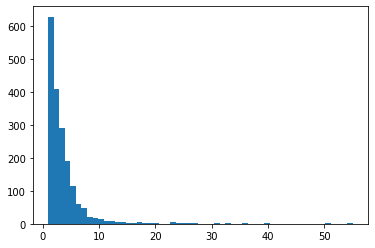

In [ ]:
plt.hist(df_cons.groupby(['image_id'])['image_id'].count(),bins=55)

In [ ]:
len(df_cons)

5898

In [ ]:
df_cons.groupby(['image_id'])['image_id'].count()

image_id
0005e8e3701dfb1dd93d53e2ff537b6e    4
000d68e42b71d3eac10ccc077aba07c1    2
00150343289f317a0ad5629d5b7d9ef9    2
0061cf6d35e253b6e7f03940592cc35e    1
008b3176a7248a0a189b5731ac8d2e95    9
                                   ..
ff0191df898268978f2c29231450fd66    3
ff335f1c7745c6184a5732cc5a01092d    2
ff4cd09578f32d803e5996a4a2ec29b2    1
ff60d1425ffd67d12aa61e3eb3b45040    3
ff924bcbd38f123aec723aa7040d7e43    5
Name: image_id, Length: 1851, dtype: int64

In [ ]:
df_split = pd.DataFrame({'BB Counts': df_cons.groupby(['image_id'])['image_id'].count()})

In [ ]:
#Notar que tenemos un total de 1851 imágenes
print(type(df_split))
df_split

<class 'pandas.core.frame.DataFrame'>


,BB Counts
image_id,
0005e8e3701dfb1dd93d53e2ff537b6e,4
000d68e42b71d3eac10ccc077aba07c1,2
00150343289f317a0ad5629d5b7d9ef9,2
0061cf6d35e253b6e7f03940592cc35e,1
008b3176a7248a0a189b5731ac8d2e95,9
...,...
ff0191df898268978f2c29231450fd66,3
ff335f1c7745c6184a5732cc5a01092d,2
ff4cd09578f32d803e5996a4a2ec29b2,1


In [ ]:
df_split['Upper'] = df_split['BB Counts'].gt(2)

In [ ]:
df_split

,BB Counts,Upper
image_id,,
0005e8e3701dfb1dd93d53e2ff537b6e,4,True
000d68e42b71d3eac10ccc077aba07c1,2,False
00150343289f317a0ad5629d5b7d9ef9,2,False
0061cf6d35e253b6e7f03940592cc35e,1,False
008b3176a7248a0a189b5731ac8d2e95,9,True
...,...,...
ff0191df898268978f2c29231450fd66,3,True
ff335f1c7745c6184a5732cc5a01092d,2,False
ff4cd09578f32d803e5996a4a2ec29b2,1,False


In [ ]:
df_split.groupby(['Upper']).count()

,BB Counts
Upper,
False,1038
True,813


Separamos en train, test y validation las imágenes, agrupando por cantidad de bounding box que poseen las mismas (grupo: muchos bounding boxes, y grupo pocos bounding boxes). Como no tenemos un dataset tan grande, utilizamos el 70% como Train y el 15% restante como test y validation. Esto significa que nos quedamos con 1295 imágenes en train, 278 para validation y 278 para test. 


In [ ]:
from sklearn.model_selection import train_test_split
(imgs_train_valid, imgs_test,class_train_valid, class_test) = train_test_split(df_split.index,df_split['Upper'].to_numpy(),test_size = 0.15, random_state=42, stratify=df_split['Upper'].to_numpy())
(imgs_train, imgs_valid, class_train, class_valid) = train_test_split(imgs_train_valid,class_train_valid,test_size = 0.1767, random_state=42, stratify=class_train_valid)

In [ ]:
imgs_train_valid

Index(['ef8c3f4f4d6b6d278abdbc8077051629', 'f5f8866773cc80861a7f5c30502d0fbb',
       '771bad280d3f521bae62b331ea7db8f4', '7962a93b582c5bc277d892f31dfc5dae',
       '6a4f9965e83bfad45d66d4afa5d28cc5', '2d4a3f928bbd1cf6cec20fc617af2fa3',
       '789d2cadef93195598e3906ec5fab0e9', '4c4cf43e7c8529c430c1d1295fee1784',
       'd2bc15eab8150cfcbcd9364c20c7297d', '3145bee8f1346fa89938289eedd7b05c',
       ...
       '145691883baff4df3e4863ca6354c44e', 'f4d7d5de6fbfafb222c389fb23251e80',
       '2cf24e4b4380252c4dc94a0e63bed062', '168ff8ed5a696e2b1270b6449a996cd5',
       '59615049fbc2df4b0aaeb3aca6648421', '768db39e794f0d37d296c418e50d8126',
       'cca122e46a24a6ccfeba9ade9f7b933c', '8e8f6687544bfcd254e60e5e28b260d6',
       '886159a41e7589ba0d0713980591e27d', '8788745c121bcbce59873c943afa0ebd'],
      dtype='object', name='image_id', length=1573)

In [ ]:
class_train_valid

array([False,  True, False, ..., False, False,  True])

In [ ]:
imgs_valid

Index(['c5010a72f3e20e9b59d7bb991d3c633b', '2461ca359068b06237e93aae140a25f3',
       'ec6ec12533b8495bb7344d8895dd4f05', 'debcc0c8e3b22dd08b85037c91da1df7',
       '43d3137e74ebd344636228e786cb91b0', '23c9516db65572bae3125bcaead302d3',
       'e25d75e8e6b0327356d1566d324ecfcb', '01a3c3d994d85ce5634d2d13c03fd4b0',
       '56923ac65e4a3bf6e8ec0af530c4a205', '659e8fa4b3d038c98fbfc0ab4cfcd411',
       ...
       '58c96358e94c768b0eeb723bf985d575', '7216517a6e4daf3bd95b7b065dac16dd',
       '6974b05fb97620ec153a9eb3200db4eb', '6de2efbed6b23441ab46cbcfa980e4bd',
       '2ebb05b4c603d590854c621fa4f1fd5c', '1aaa4b217affae30113bd3a7a384a4c7',
       '168ff8ed5a696e2b1270b6449a996cd5', 'e9af0316eb1e082f0b2fac36ecf9a6c6',
       '816008f1b6e1fd740b3b52bb9e258377', 'c41d4f698ccccbf7068c44c8c14f4e16'],
      dtype='object', name='image_id', length=278)

In [ ]:
df_imgs_valid = pd.DataFrame(imgs_valid)

In [ ]:
df_imgs_valid

,image_id
0,c5010a72f3e20e9b59d7bb991d3c633b
1,2461ca359068b06237e93aae140a25f3
2,ec6ec12533b8495bb7344d8895dd4f05
3,debcc0c8e3b22dd08b85037c91da1df7
4,43d3137e74ebd344636228e786cb91b0
...,...
273,1aaa4b217affae30113bd3a7a384a4c7
274,168ff8ed5a696e2b1270b6449a996cd5
275,e9af0316eb1e082f0b2fac36ecf9a6c6
276,816008f1b6e1fd740b3b52bb9e258377


In [ ]:
df_imgs_valid.to_csv('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/imgs_valid.csv')

In [ ]:
imgs_train

Index(['a8dd1496dde8d6f63316c8ec2a823b38', '4eed7a6bb03888eade13343f141dd5c8',
       'a0a6050fdda9f59eff1ca6a197883fcb', 'c42b5e8105ed48a96bf7273e25f2a047',
       'd700828f067b24ac9bc70bc8bbee1bea', 'b27c879787934c51d42095098dd313b2',
       '231a4b73de5ac7e0218f736b6b6ff1f2', 'f29df9890df1e30033396c8f220a9f14',
       '9b9f47628be6a48ddb41aec8ba39b454', 'c58bc096aa929d9645f0a15a62771893',
       ...
       '21d0e0bb639ebec0b2a2ce0c5c805344', 'b4ed7fedb5fd04e7a72bf8bc2f8aa91c',
       '5d2a481a562112395f28010b079a9cf1', 'f6fc6f200924da874ae95664661e67aa',
       '6072a9325dcf5318517a0696040a9dcc', 'ee9e445e316c60e028de2486e3f459df',
       '43e96bafa84091eec856901f949efa05', '0453de2faeb8d349af739a68d9dee1cb',
       '1c1ef26e3b3323f74041f6dd2371cd24', 'ee47fd39217a0d25550cb6b9badd3ee2'],
      dtype='object', name='image_id', length=1295)

In [ ]:
df_imgs_train = pd.DataFrame(imgs_train)
df_imgs_train.to_csv('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/imgs_train.csv')

In [ ]:
df_imgs_test = pd.DataFrame(imgs_test)
df_imgs_test.to_csv('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/imgs_test.csv')

In [ ]:
imgs_train = pd.read_csv('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/imgs_train.csv')
imgs_valid = pd.read_csv('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/imgs_valid.csv')
imgs_test = pd.read_csv('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/imgs_test.csv')

Ahora debemos volver a nuestro dataset y clasificar cada una de las filas como correspondiente a train, test o validation, según los resultados de nuestro split. 

In [ ]:
df_split['image_id'] = df_split.index

In [ ]:
df_split['Group'] = 'a'

In [ ]:
imgs_train[0]

'a8dd1496dde8d6f63316c8ec2a823b38'

In [ ]:
# Código ineficiente, tarda mucho en correr. 
for i in imgs_train:
  for index, row in df_cons.iterrows():
    if (i==row['image_id']):
      df_cons.loc[index, 'Group'] = 'Train'

In [ ]:
df_cons.head()

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area,Group
0,7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,0.216900,0.701461,0.262850,0.740829,2568,3353,0.239875,0.721145,0.045950,0.039368,0.001809,NaN
1,10,7c1add6833d5f0102b0d3619a1682a64,Consolidation,7,R10,0.203804,0.441938,0.306726,0.505309,2944,3014,0.255265,0.473623,0.102921,0.063371,0.006522,NaN
2,17,80caa435b6ab5edaff4a0a758ffaec6e,Consolidation,1,R9,0.110297,0.148696,0.461180,0.761184,3001,3107,0.285738,0.454940,0.350883,0.612488,0.214912,Train
3,36,be1bb194dfb986bf7554b491852b8901,Consolidation,7,R9,0.726888,0.500000,0.819661,0.594727,3072,3072,0.773275,0.547363,0.092773,0.094727,0.008788,Train
4,40,8e063eadea9a6aeb684c893c8598be3e,Consolidation,8,R10,0.132581,0.587107,0.154443,0.601887,2836,3180,0.143512,0.594497,0.021862,0.014780,0.000323,Train


In [ ]:
# Código ineficiente, tarda mucho en correr. 
for i in imgs_valid:
  for index, row in df_cons.iterrows():
    if (i==row['image_id']):
      df_cons.loc[index, 'Group'] = 'Valid'

In [ ]:
df_cons.head()

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area,Group
0,7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,0.216900,0.701461,0.262850,0.740829,2568,3353,0.239875,0.721145,0.045950,0.039368,0.001809,Valid
1,10,7c1add6833d5f0102b0d3619a1682a64,Consolidation,7,R10,0.203804,0.441938,0.306726,0.505309,2944,3014,0.255265,0.473623,0.102921,0.063371,0.006522,Valid
2,17,80caa435b6ab5edaff4a0a758ffaec6e,Consolidation,1,R9,0.110297,0.148696,0.461180,0.761184,3001,3107,0.285738,0.454940,0.350883,0.612488,0.214912,Train
3,36,be1bb194dfb986bf7554b491852b8901,Consolidation,7,R9,0.726888,0.500000,0.819661,0.594727,3072,3072,0.773275,0.547363,0.092773,0.094727,0.008788,Train
4,40,8e063eadea9a6aeb684c893c8598be3e,Consolidation,8,R10,0.132581,0.587107,0.154443,0.601887,2836,3180,0.143512,0.594497,0.021862,0.014780,0.000323,Train


In [ ]:
# Código ineficiente, tarda mucho en correr. 
for i in imgs_test:
  for index, row in df_cons.iterrows():
    if (i==row['image_id']):
      df_cons.loc[index, 'Group'] = 'Test'

In [ ]:
# Cuantos BB hay por clase
df_cons.groupby(['Group'])['Group'].count()

Group
Test      849
Train    4163
Valid     886
Name: Group, dtype: int64

In [ ]:
df_cons.to_excel('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/consolidations_split.xlsx')

#Data Exploration

##Localización de los Centros de Bounding Boxes

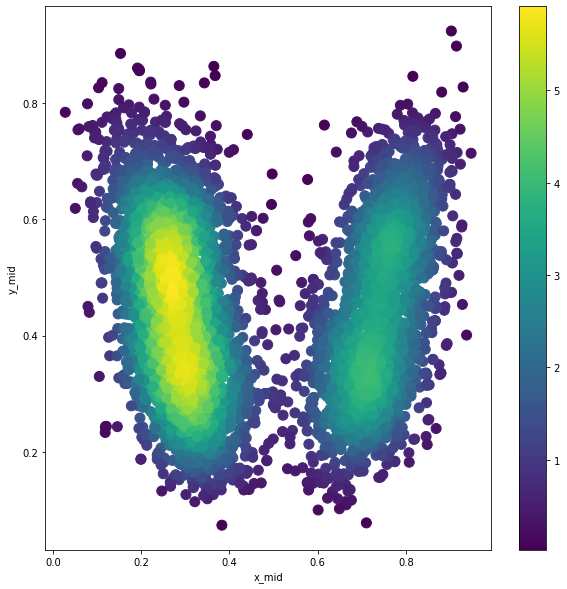

In [ ]:
from scipy.stats import gaussian_kde


x = df_cons.x_mid.values
y = df_cons.y_mid.values

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10, 10))
#ax.axis('off')
sc = ax.scatter(x, y, c=z, s=100, cmap='viridis')
ax.set_xlabel('x_mid')
ax.set_ylabel('y_mid')
plt.colorbar(sc)
plt.show()

##Comparación ancho / alto de BB

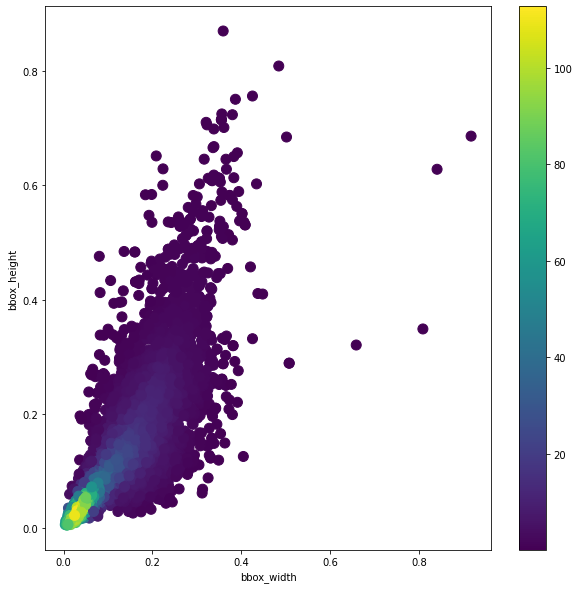

In [ ]:
x = df_cons.w.values
y = df_cons.h.values

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10, 10))
#ax.axis('off')
sc = ax.scatter(x, y, c=z, s=100, cmap='Blues')
ax.set_xlabel('bbox_width')
ax.set_ylabel('bbox_height')
plt.colorbar(sc)
plt.show()

#Organize folders & Labels

In [ ]:
# Crear directorios para oranizar as imagenes
os.makedirs('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels/train', exist_ok = True)
os.makedirs('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels/val', exist_ok = True)
os.makedirs('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels/test', exist_ok = True)
os.makedirs('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/train', exist_ok = True)
os.makedirs('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/val', exist_ok = True)
os.makedirs('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test', exist_ok = True)

In [ ]:
imgs_train

,Unnamed: 0,image_id
0,0,a8dd1496dde8d6f63316c8ec2a823b38
1,1,4eed7a6bb03888eade13343f141dd5c8
2,2,a0a6050fdda9f59eff1ca6a197883fcb
3,3,c42b5e8105ed48a96bf7273e25f2a047
4,4,d700828f067b24ac9bc70bc8bbee1bea
...,...,...
1290,1290,ee9e445e316c60e028de2486e3f459df
1291,1291,43e96bafa84091eec856901f949efa05
1292,1292,0453de2faeb8d349af739a68d9dee1cb
1293,1293,1c1ef26e3b3323f74041f6dd2371cd24


In [ ]:
for file in tqdm(imgs_train['image_id']):
  shutil.copy('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train/'+file+'.jpg','/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/train')
  #filename = file.split('.')[0]
  #shutil.copy(os.path.join(label_dir, 'train', filename+'.txt'), 'content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS')

for file in tqdm(imgs_valid):
  shutil.copy((os.path.join(file,'.png'),'/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/val')
 

for file in tqdm(imgs_test):
  shutil.copy((os.path.join(file,'.png'),'/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test')
  #filename = file.split('.')[0]
  #shutil.copy(os.path.join(label_dir, 'train', filename+'.txt'), 'content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS')



In [ ]:
for file in tqdm(imgs_valid['image_id']):
  shutil.copy('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train/'+file+'.jpg','/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/val')

for file in tqdm(imgs_test['image_id']):
  shutil.copy('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train/'+file+'.jpg','/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test')

In [ ]:
label_dir = '/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels_down'

for file in tqdm(imgs_valid['image_id']):
  #shutil.copy('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train/'+file+'.jpg','/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/train')
  filename = file.split('.')[0]
  shutil.copy(os.path.join(label_dir, filename+'.txt'), '/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels/val')
  #print('a')

In [ ]:
for file in tqdm(imgs_train['image_id']):
  #shutil.copy('/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train/'+file+'.jpg','/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/train')
  filename = file.split('.')[0]
  shutil.copy(os.path.join(label_dir, filename+'.txt'), '/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels/train')

In [ ]:
label_dir = '/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/labels_DS/content/labels'

len(os.listdir(label_dir))

178

#Split

Separamos en Train y Test, pero teniendo en cuenta que una única imagen puede tener más de un hallazgo. 

In [ ]:
np.shape(df_cons)

(5898, 16)

In [ ]:
# Vamos a trabajar con K folding (cross validation )
gkf  = GroupKFold(n_splits = 5)
df_cons['fold'] = -1
for fold, (train_idx, val_idx) in enumerate(gkf.split(df_cons, groups = df_cons.image_id.tolist())):
    df_cons.loc[val_idx, 'fold'] = fold
df_cons.head()

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area,fold
0,7,47ed17dcb2cbeec15182ed335a8b5a9e,Consolidation,8,R9,0.216900,0.701461,0.262850,0.740829,2568,3353,0.239875,0.721145,0.045950,0.039368,0.001809,4
1,10,7c1add6833d5f0102b0d3619a1682a64,Consolidation,7,R10,0.203804,0.441938,0.306726,0.505309,2944,3014,0.255265,0.473623,0.102921,0.063371,0.006522,4
2,17,80caa435b6ab5edaff4a0a758ffaec6e,Consolidation,1,R9,0.110297,0.148696,0.461180,0.761184,3001,3107,0.285738,0.454940,0.350883,0.612488,0.214912,2
3,36,be1bb194dfb986bf7554b491852b8901,Consolidation,7,R9,0.726888,0.500000,0.819661,0.594727,3072,3072,0.773275,0.547363,0.092773,0.094727,0.008788,0
4,40,8e063eadea9a6aeb684c893c8598be3e,Consolidation,8,R10,0.132581,0.587107,0.154443,0.601887,2836,3180,0.143512,0.594497,0.021862,0.014780,0.000323,4


In [ ]:
np.shape(df_cons)

(5898, 17)

In [ ]:
353/5

70.6

In [ ]:
fold

4

In [ ]:
train_files = []
valid_files = []
test_files   = []
test_files += list(df_cons[df_cons.fold==fold].image_path.unique())
valid_files += list(df_cons[df_cons.fold!=fold+1].image_path.unique())
train_files += list(df_cons[df_cons.fold!=fold && df_cons.fold!=fold+1].image_path.unique())
len(train_files), len(test_files), len(vaid_files)